# 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from GPUtil import showUtilization as gpu_usage

In [ ]:
!pip install opencv-python-headless<4.3

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\PAVILION/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-2-12 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [4]:
img = 'https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg'


In [14]:
#results = model(img)
#results.print()
%cd yolov5
#!python 'yolov5/detect.py' --weights yolov5s.pt --img 640 --conf 0.25 --source 'data/images/zidane.jpg'


C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect\yolov5


In [6]:
os.getcwd()

'C:\\Users\\PAVILION\\AppData\\Local\\Programs\\Python\\Python37\\Drowsiness_detect'

In [20]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
!python "detect.py" --weights yolov5s.pt --img 640 --conf 0.25 --source "data/images/zidane.jpg"

detected object name is  tie
score is  tensor(0.52546, device='cuda:0')
detected object name is  person
score is  tensor(0.57235, device='cuda:0')
detected object name is  person
score is  tensor(0.87597, device='cuda:0')


detect: weights=['yolov5s.pt'], source=data/images/zidane.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-1-28 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect\yolov5\data\images\zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.020s)
Speed: 4.0ms pre-process, 20.1ms inference, 54.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


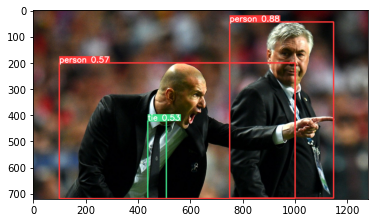

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

# 4. Real Time Detections

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [3]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['Hello','Thank_you','I_Love_You']
number_imgs = 40

In [4]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.putText(frame, '{}'.format(img_num), (50,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv2.LINE_AA)
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between capturesq
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [5]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\Hello.e104eab8-9f0a-11ec-a3fe-5c879c719f9a.jpg


In [4]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\Hello.10086a74-a472-11ec-ae06-5c879c719f9a.jpg
data\images\Hello.10086a75-a472-11ec-90df-5c879c719f9a.jpg
data\images\Hello.10086a76-a472-11ec-88cb-5c879c719f9a.jpg
data\images\Hello.10086a77-a472-11ec-bf35-5c879c719f9a.jpg
data\images\Hello.10086a78-a472-11ec-a9bb-5c879c719f9a.jpg
data\images\Hello.10086a79-a472-11ec-afa3-5c879c719f9a.jpg
data\images\Hello.1008918c-a472-11ec-b8e1-5c879c719f9a.jpg
data\images\Hello.1008918d-a472-11ec-8948-5c879c719f9a.jpg
data\images\Hello.1008918e-a472-11ec-99bd-5c879c719f9a.jpg
data\images\Hello.1008918f-a472-11ec-a46f-5c879c719f9a.jpg
data\images\Hello.10089190-a472-11ec-bc85-5c879c719f9a.jpg
data\images\Hello.10089191-a472-11ec-96d3-5c879c719f9a.jpg
data\images\Hello.10089192-a472-11ec-9205-5c879c719f9a.jpg
data\images\Hello.10089193-a472-11ec-8e34-5c879c719f9a.jpg
data\images\Hello.10089194-a472-11ec-bda3-5c879c719f9a.jpg
data\images\Hello.10089195-a472-11ec-a6ba-5c879c719f9a.jpg
data\images\Hello.10089196-a472-11ec-b9c6-5c879c719f9a.j

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade //streamlit
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [7]:
gpu_usage()
torch.cuda.empty_cache()
gpu_usage()


| ID | GPU | MEM |
------------------
|  0 | 96% | 32% |
| ID | GPU | MEM |
------------------
|  0 | 71% | 32% |


In [6]:
!cd yolov5 && python train.py --img 640 --batch 1 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 1
gpu_usage()

^C
| ID | GPU  | MEM |
-------------------
|  0 | 100% | 32% |


# 6. Load Custom Model

In [5]:
%cd C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect

C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect


In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp28/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\PAVILION/.cache\torch\hub\master.zip
YOLOv5  2022-3-15 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7058671 parameters, 0 gradients
Adding AutoShape... 


In [43]:
img = os.path.join('test', 'drowsy.jpg') # data/images/awake.1cf8c168-80e6-11ec-9c1c-5c879c719f9a.jpg

In [44]:
results = model(img)

In [45]:
results.print()

image 1/1: 400x600 (no detections)
Speed: 1111.6ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


In [14]:
os.listdir()

['.ipynb_checkpoints',
 "0.11.0'",
 "1.1.4'",
 "1.4.1'",
 "2.23.0'",
 "4.41.0'",
 "5.3.1'",
 'data',
 'data_alpha',
 'Drowsiness Detection Tutorial.ipynb',
 'Drowsiness Detection Tutorial.py',
 'labelImg',
 'yolov5',
 'yolov5s.pt']

In [8]:
%cd yolov5

C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect\yolov5


In [9]:

!python "detect.py" --weights "runs/train/exp28/weights/last.pt" --img 640 --source 0

detected object name is  thankyou
score is  tensor(0.53231, device='cuda:0')
detected object name is  thankyou

detect: weights=['runs/train/exp28/weights/last.pt'], source=0, data=dataset.yml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-1-28 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7058671 parameters, 0 gradients
1/1: 0...  Success (inf frames 640x480 at 30.00 FPS)

0: 480x640 Done. (0.983s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 D


score is  tensor(0.63181, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.65317, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.65568, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.65568, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.62777, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.62777, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.64492, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.64492, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.65141, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.63541, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.63290, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.63290, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.61273, device='cuda:0')
detected object name is  thankyo


0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.040s)
0: 480x640 1 thankyou, Done. (0.017s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.017s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.017s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.017s)
0: 480x640 1 thankyou, Done. (0.017s)
0: 480x640 1 thankyou, Done. (0.016s)
0: 480x640 1 thankyou, Done. (0.017s)
0: 480x640 1 thankyou, Done. (0.017s)
0: 480x640 1 thankyou, Done. 


detected object name is  thankyou
score is  tensor(0.64184, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.62318, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.61754, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.61754, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.65140, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.63662, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.65614, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.65430, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.66676, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.65116, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.63909, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.66265, device='cuda:0')
detected object name is  thankyou
score is  tensor(0.62410, device='cuda:0'

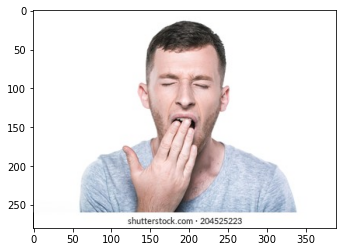

In [42]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render())) 
plt.show()

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    print(results.print())
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

image 1/1: 480x640 (no detections)
Speed: 6.0ms pre-process, 800.8ms inference, 9.8ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 21.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 21.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 23.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 22.1ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 22.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 20.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.1ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 4.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 4.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 4.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.6ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.7ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 18.0ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.6ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 18.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.4ms pre-process, 17.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 3.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
